<a href="https://colab.research.google.com/github/yanyan0812/yanyan0812/blob/main/Seoul_Bike_Sharing_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)


2.14.0


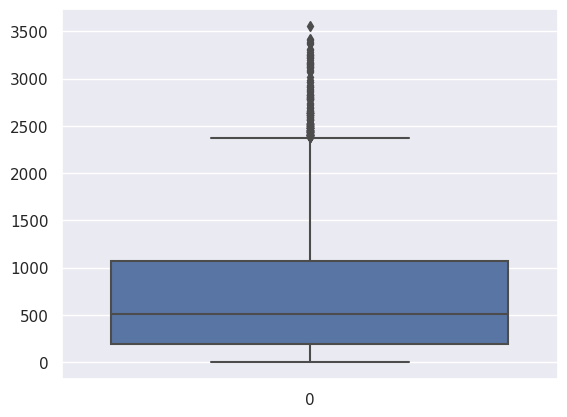

ADF Statistic: -6.946971
p-value: 0.000000


In [4]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')
# 设置Seaborn和Matplotlib的样式

sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True)

# 将日期列设置为时间索引并指定日期格式为 DD/MM/YYYY
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.set_index('Date')

# 创建时间相关的特征（如果需要）
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday

# 可视化数据，检查是否有异常值
sns.boxplot(data=data['Rented Bike Count'])
plt.show()

# 时间序列的平稳性检验
result = adfuller(data['Rented Bike Count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# 如果非平稳，则进行差分
if result[1] > 0.05:
    data['Rented Bike Count'] = data['Rented Bike Count'].diff().dropna()

    # 再次检验平稳性
    result = adfuller(data['Rented Bike Count'].dropna())
    print('ADF Statistic after differencing: %f' % result[0])
    print('p-value after differencing: %f' % result[1])





In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Weekday
Date,,,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


<Axes: ylabel='Date'>

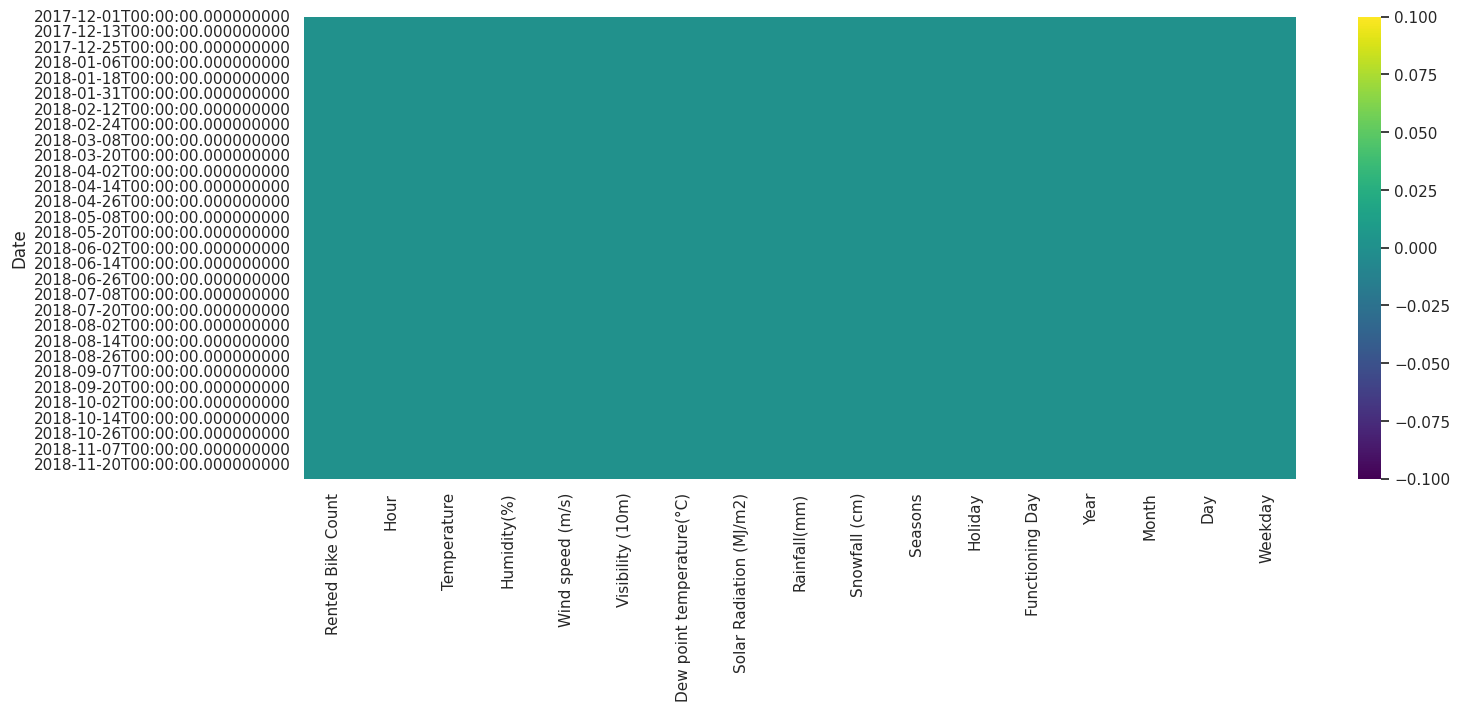

In [ ]:
plt.figure(figsize=(16,6))
data.isnull().sum()
sns.heatmap(data.isnull(),cmap="viridis")

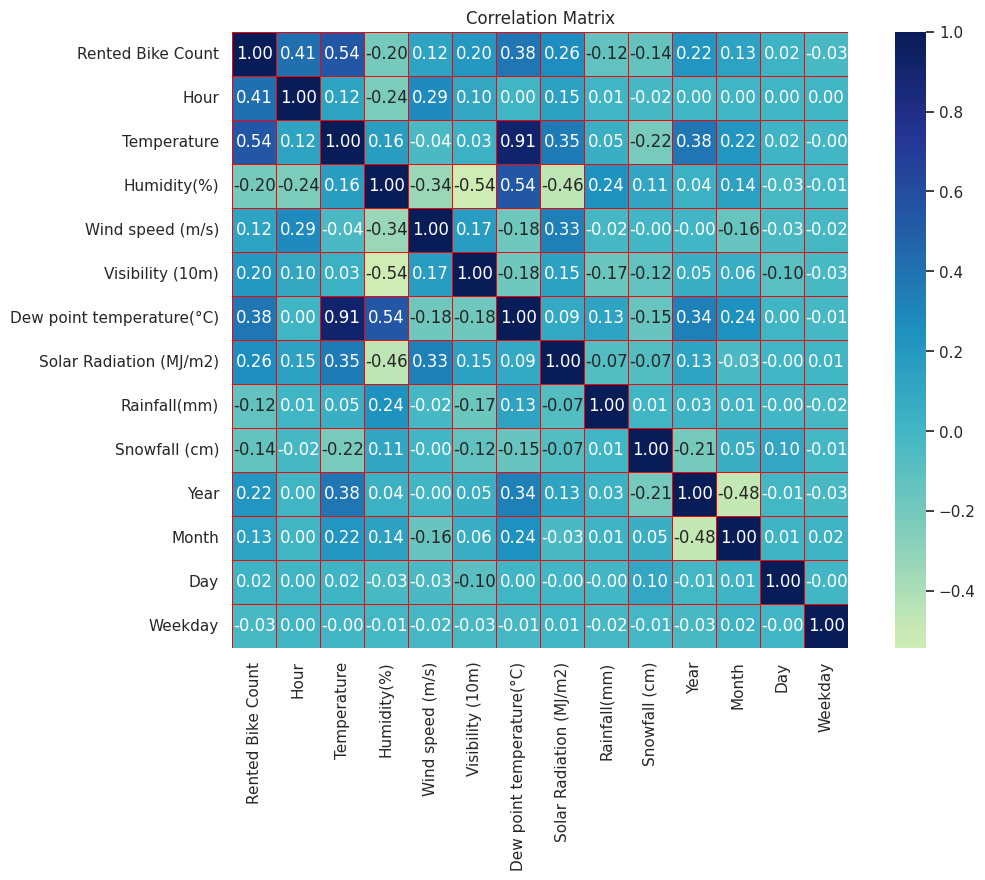

In [ ]:
# 计算相关系数矩阵，明确指定 numeric_only=True
corr_matrix = data.corr(numeric_only=True)

# 使用 seaborn 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu", square=True, linewidths=.5, annot=True, fmt=".2f", center=0, linecolor="red")
plt.title("Correlation Matrix")
plt.show()

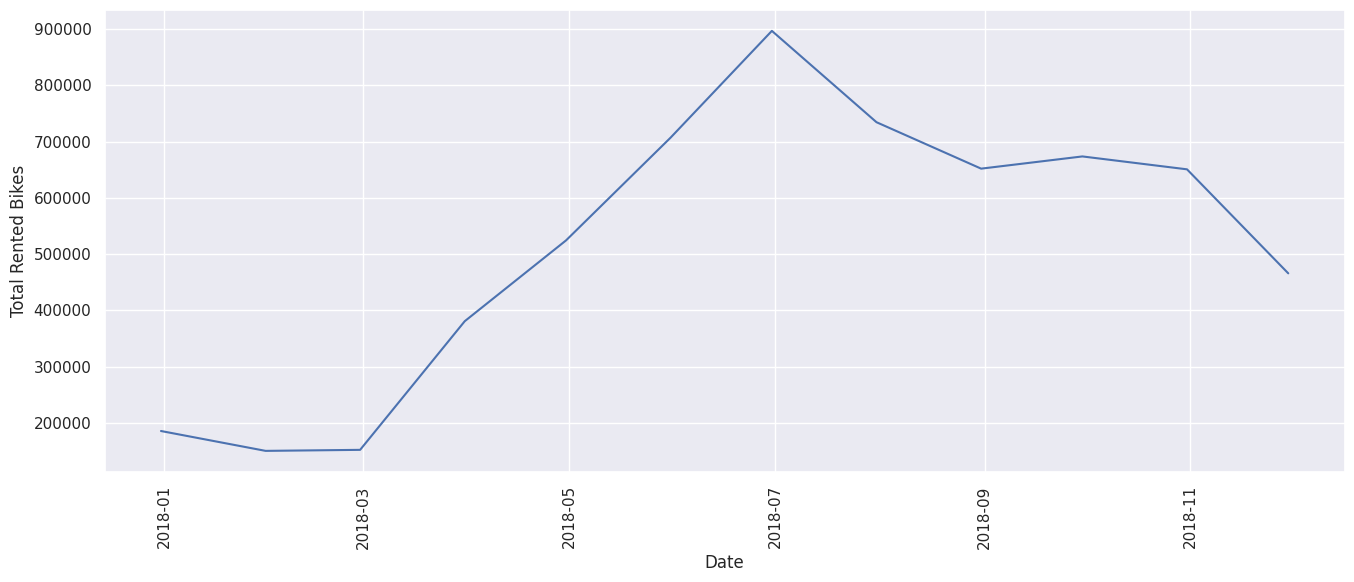

In [ ]:


# 对“Rented Bike Count”列进行重采样和求和
df_by_month = data['Rented Bike Count'].resample("M").sum()

# 绘制线性图表
plt.figure(figsize=(16,6))
sns.lineplot(x=df_by_month.index, y=df_by_month)
plt.xticks(rotation=90)
plt.ylabel('Total Rented Bikes')

# 显示图表
plt.show()

Text(0, 0.5, 'Rented Bike Count')

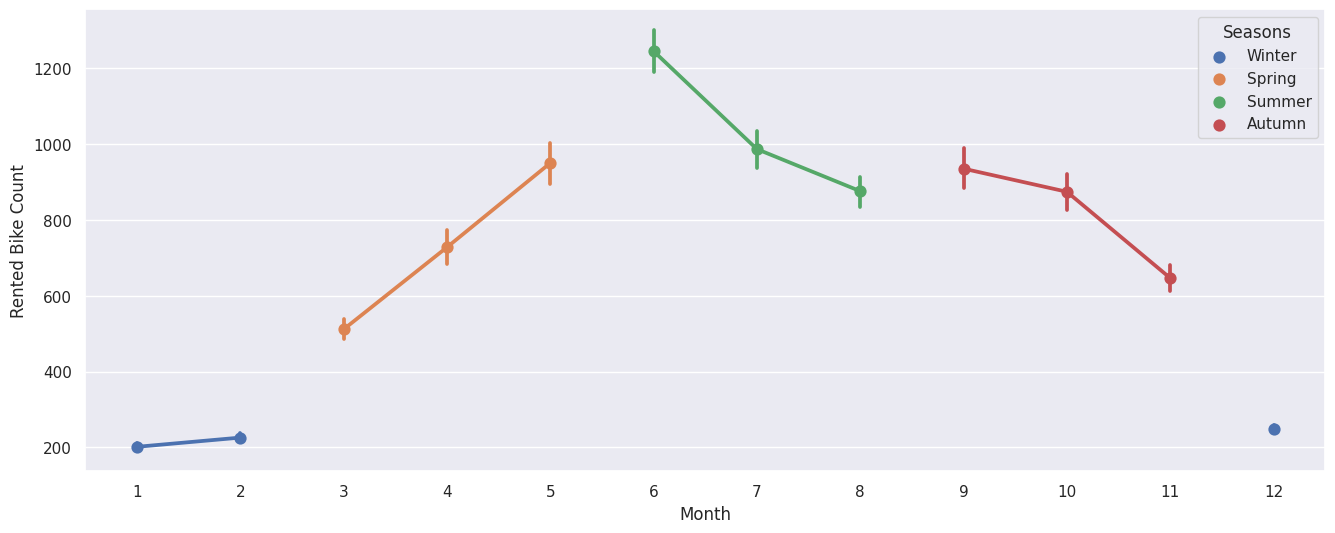

In [ ]:
# 如果您的日期时间数据在索引中
data['Month'] = data.index.month

# 或者，如果日期时间数据在一个列中，比如名为 'Date'
# data['Month'] = pd.to_datetime(data['Date']).dt.month

# 然后创建点图
plt.figure(figsize=(16, 6))
sns.pointplot(data=data, hue='Seasons', y='Rented Bike Count', x='Month')
plt.xlabel("Month")
plt.ylabel("Rented Bike Count")


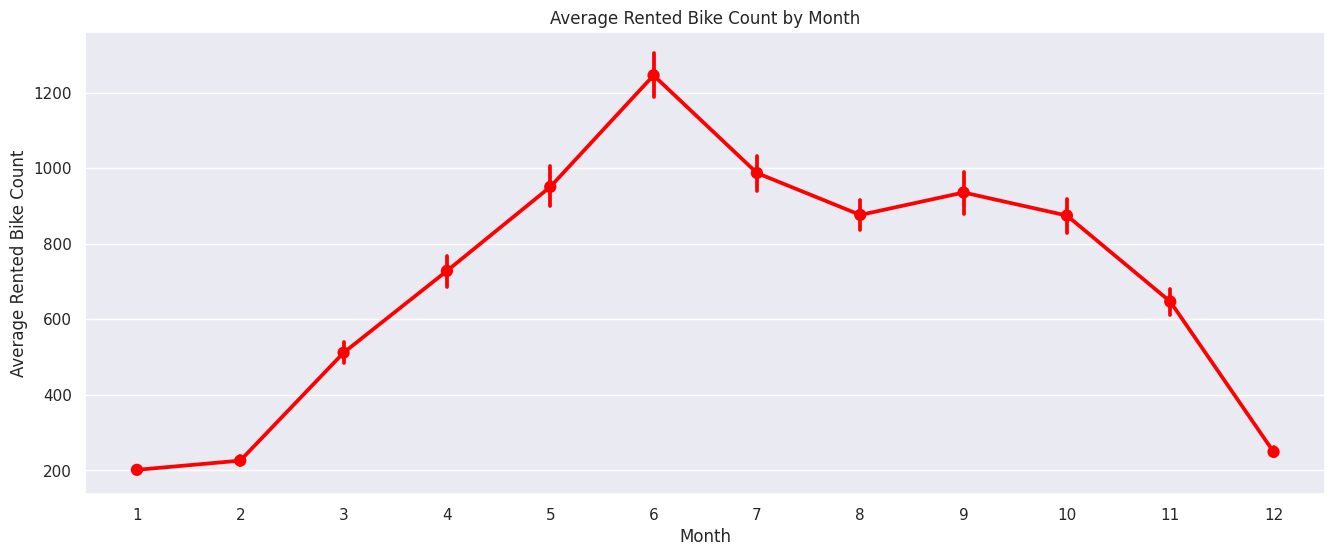

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

# 确保日期列是日期时间格式
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # 格式化日期，确保与您数据中的格式匹配

# 从日期列中提取月份
data['Month'] = data['Date'].dt.month

# 使用Seaborn绘制点图
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Month', y='Rented Bike Count', color="red")
plt.title("Average Rented Bike Count by Month")
plt.xlabel("Month")
plt.ylabel("Average Rented Bike Count")
plt.show()

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

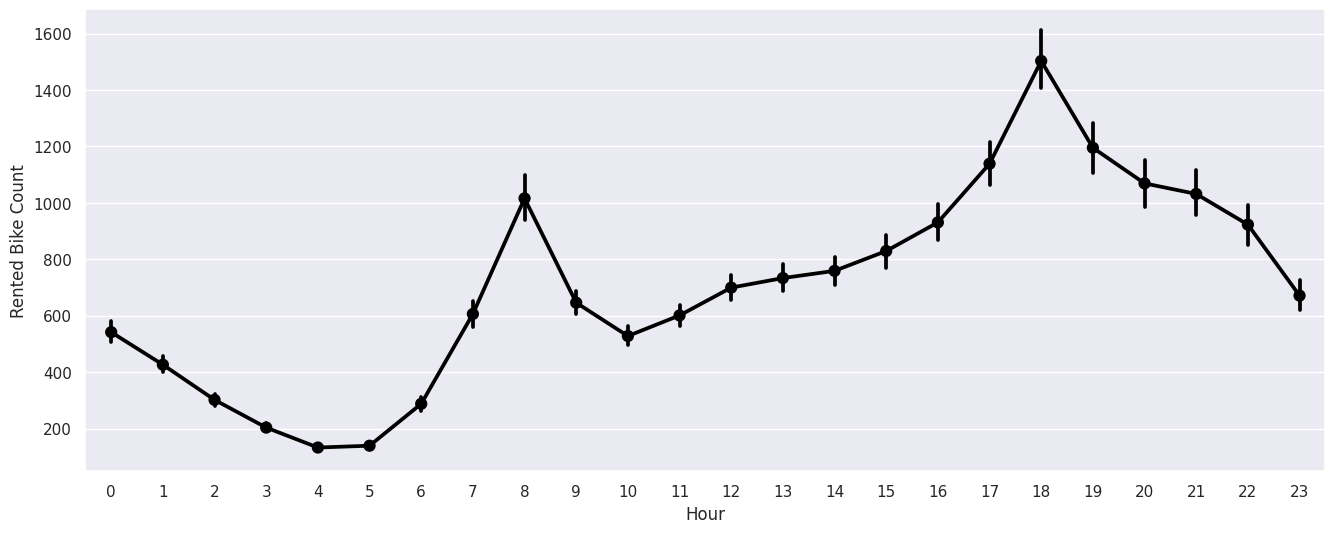

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Hour', y='Rented Bike Count', color="black")


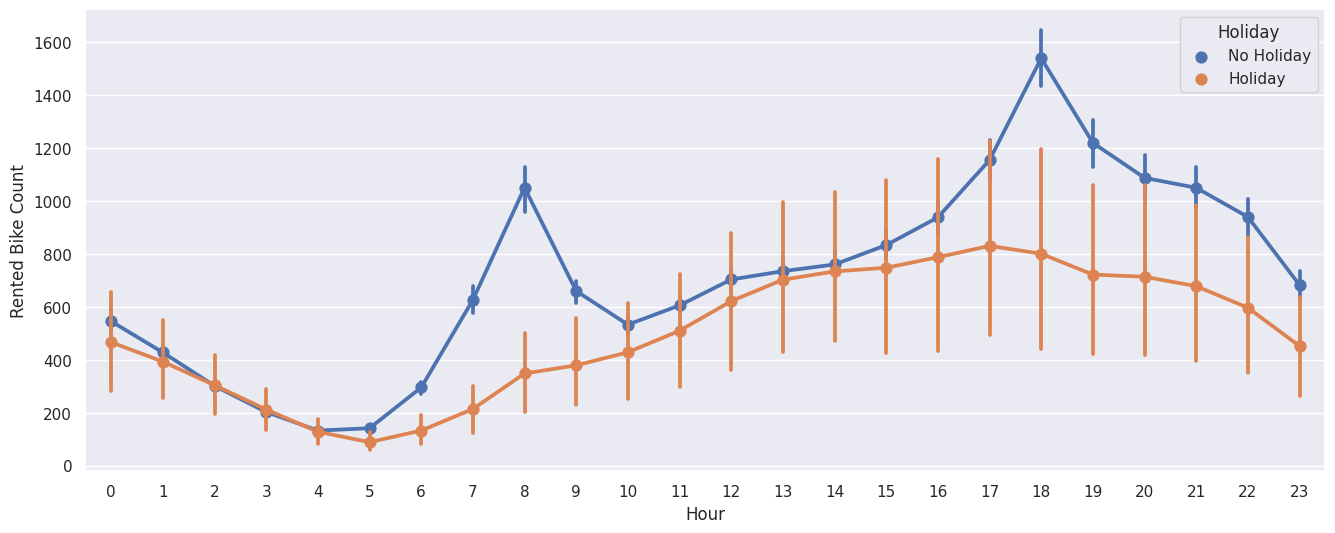

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设您的 DataFrame 名为 data，包含以下列名
# 'Hour' 表示小时
# 'Rented Bike Count' 表示租借自行车数量
# 'Holiday' 表示假期标志

# 创建一张点图
plt.figure(figsize=(16, 6))
sns.pointplot(data=data, x='Hour', y='Rented Bike Count', hue='Holiday')
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

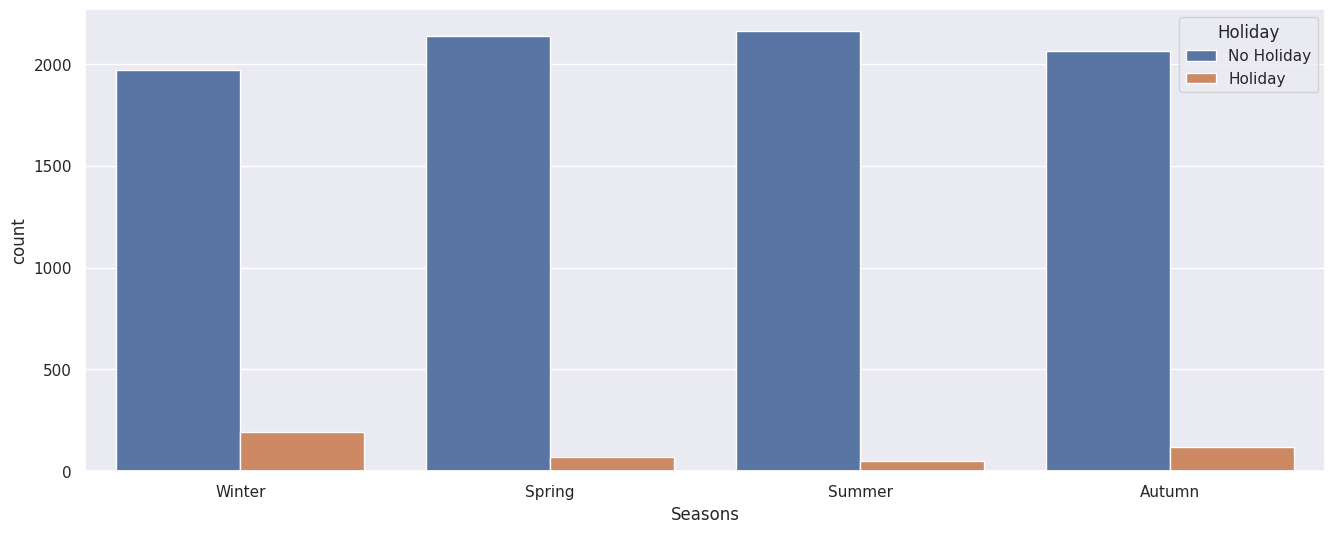

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))

# 分组统计数量
sns.countplot(data=data,
              x='Seasons',  # 使用正确的列名
              hue='Holiday'  # 使用正确的列名
             )

plt.show()

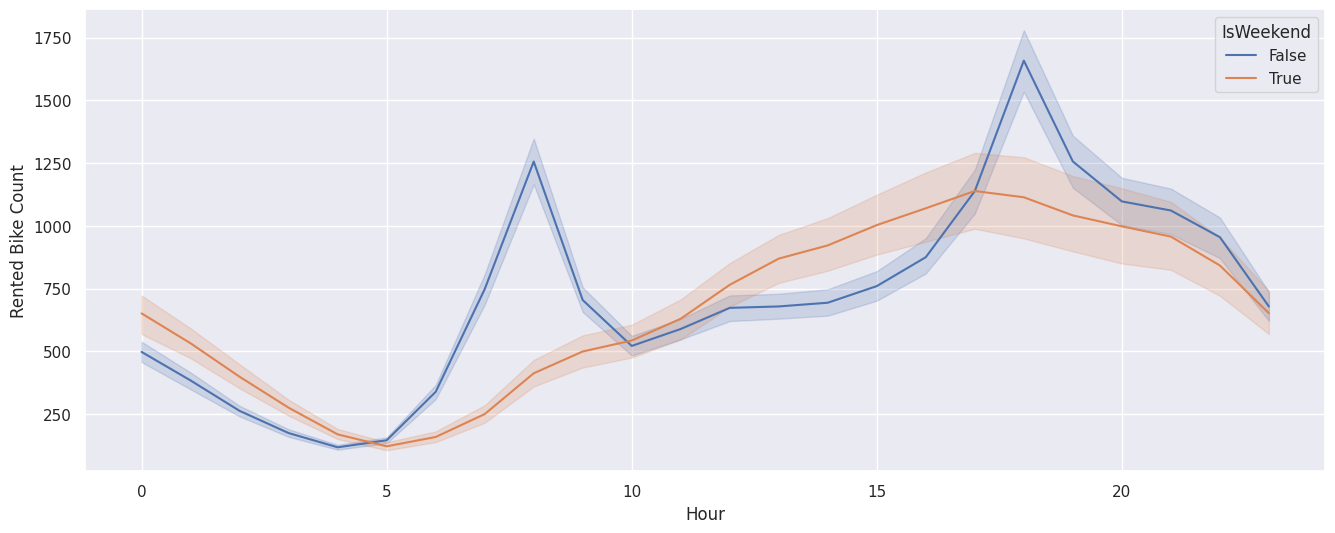

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

# 数据预处理
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.set_index('Date')

# 添加星期几信息
data['DayOfWeek'] = data.index.dayofweek
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: x >= 5)

plt.figure(figsize=(16,6))

# 绘制线性图
sns.lineplot(
    data=data,
    x='Hour',  # 使用正确的列名
    y='Rented Bike Count',  # 租赁次数的列名
    hue='IsWeekend'  # 根据是否是周末绘制
)

plt.show()

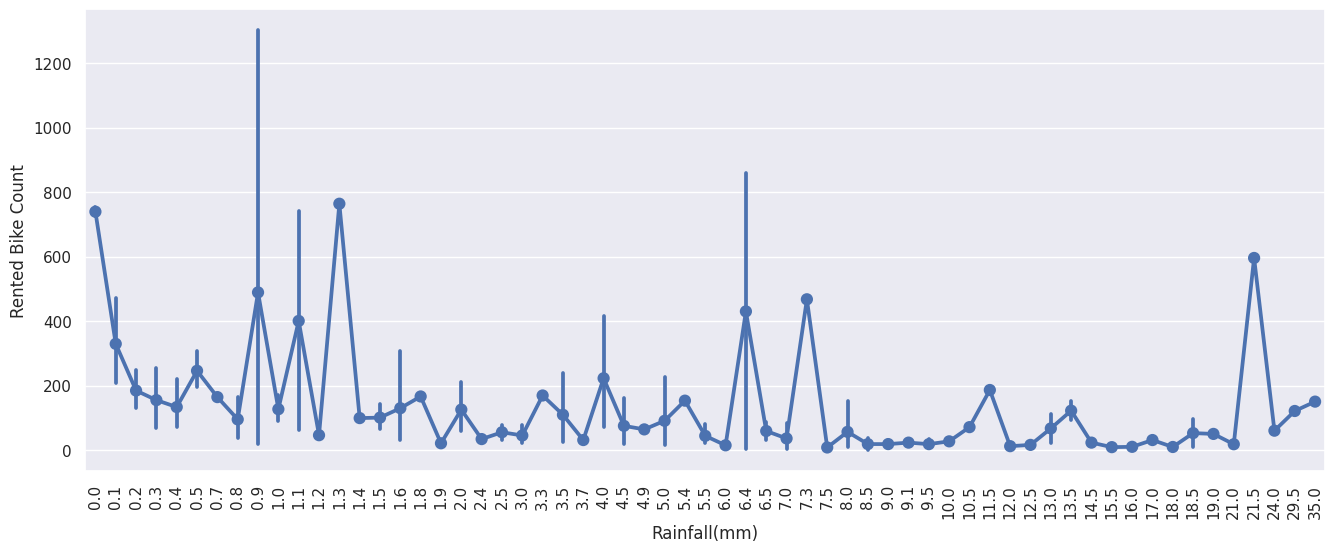

In [ ]:
plt.figure(figsize=(16,6))

# 使用 Rainfall(mm) 列作为 x 轴数据
sns.pointplot(data=data,
              x='Rainfall(mm)',
              y='Rented Bike Count')  # 确保 y 轴使用的是数据集中的正确列名

plt.xticks(rotation=90)

plt.show()

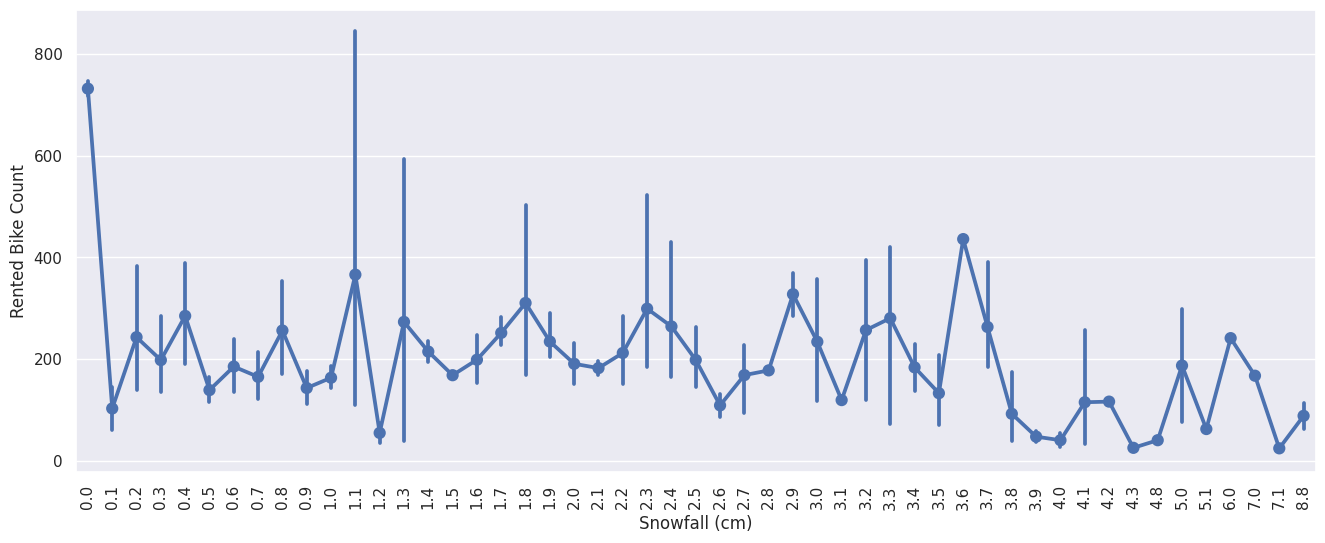

In [ ]:
plt.figure(figsize=(16,6))

# 使用 'Snowfall (cm)' 列作为 x 轴数据
sns.pointplot(data=data,
              x='Snowfall (cm)',
              y='Rented Bike Count')  # 确保 y 轴使用的是数据集中的正确列名

plt.xticks(rotation=90)

plt.show()

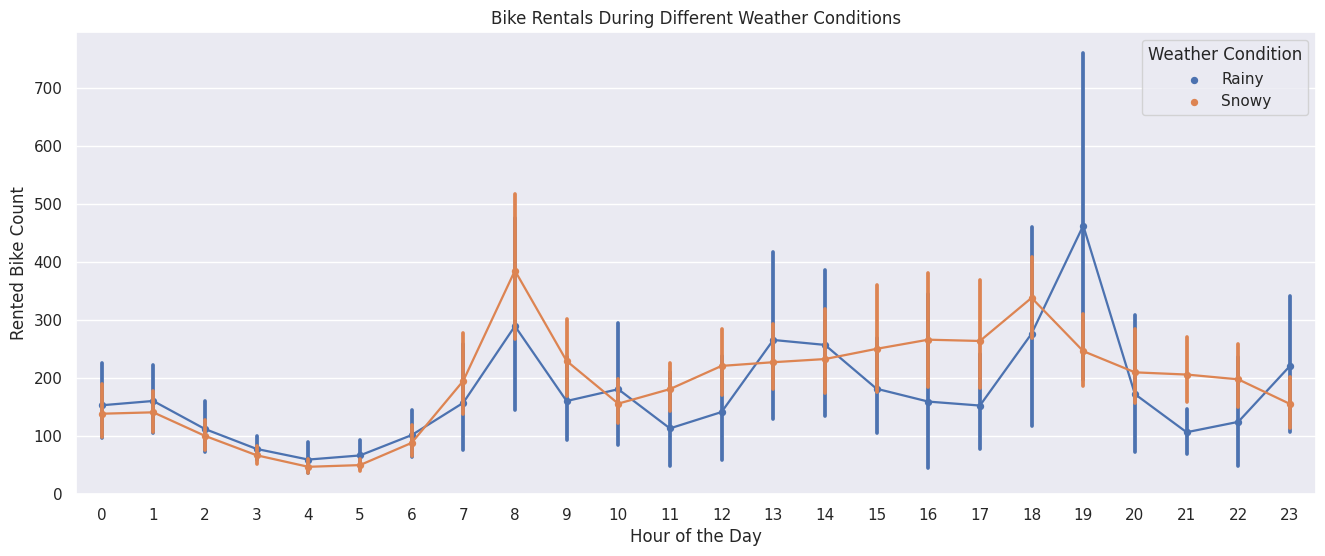

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据，使用适当的编码
data = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

# 数据预处理
# 将 'Date' 列转换为日期时间格式，并设置为索引
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.set_index('Date')

# 创建一个新列来标识天气条件
data['Weather Condition'] = 'Clear'
data.loc[data['Rainfall(mm)'] > 0, 'Weather Condition'] = 'Rainy'
data.loc[data['Snowfall (cm)'] > 0, 'Weather Condition'] = 'Snowy'

# 筛选只包含下雨和下雪的数据
weather_data = data[data['Weather Condition'] != 'Clear']

# 绘制图表
plt.figure(figsize=(16,6))
sns.pointplot(data=weather_data, x='Hour', y='Rented Bike Count', hue='Weather Condition', scale=0.6)
plt.title("Bike Rentals During Different Weather Conditions")
plt.xlabel("Hour of the Day")
plt.ylabel("Rented Bike Count")
plt.show()

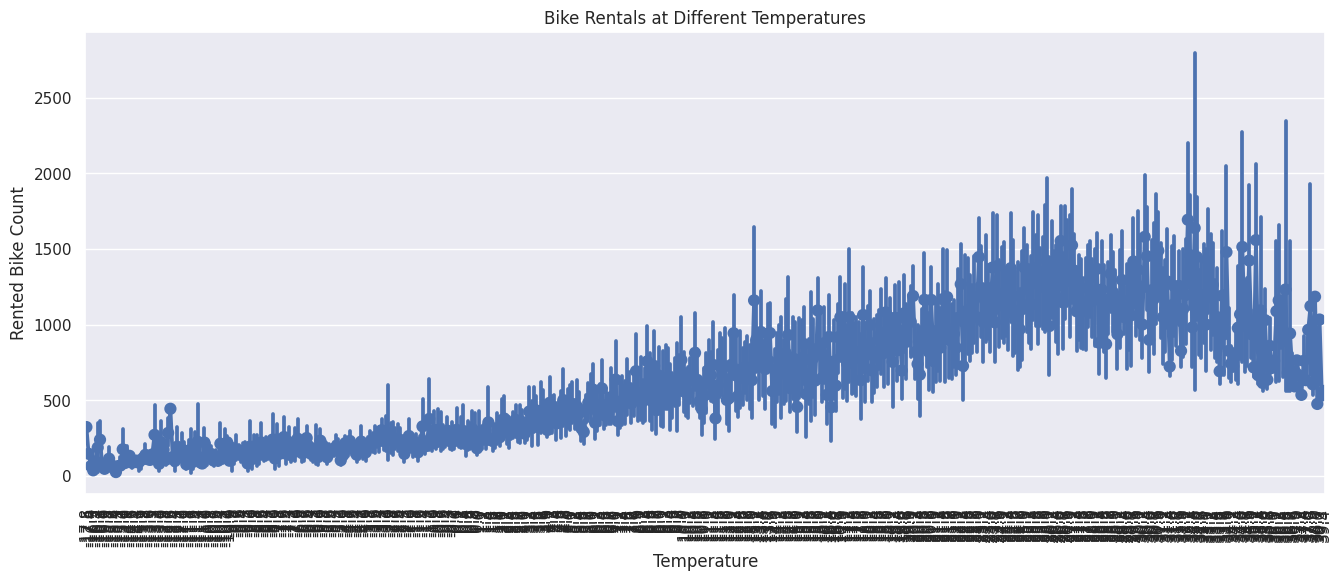

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据，使用适当的编码
data = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

# 将 'Date' 列转换为日期时间格式，并设置为索引
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.set_index('Date')

# 使用 'Temperature' 列作为 x 轴数据
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Temperature', y='Rented Bike Count')

plt.xticks(rotation=90)
plt.title("Bike Rentals at Different Temperatures")
plt.xlabel("Temperature")
plt.ylabel("Rented Bike Count")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.1,random_state=0)

print(train.shape)
print(test.shape)

(7884, 17)
(876, 17)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = ['Temperature', 'Humidity(%)', 'Wind speed (m/s)']
trans_1 = scaler.fit(train[num_cols].to_numpy())
train.loc[:, num_cols] = trans_1.transform(train[num_cols].to_numpy())
test.loc[:, num_cols] = trans_1.transform(test[num_cols].to_numpy())

bike_count_scaler = MinMaxScaler()
trans_2 = bike_count_scaler.fit(train[["Rented Bike Count"]])
train["Rented Bike Count"] = trans_2.transform(train[["Rented Bike Count"]])
test["Rented Bike Count"] = trans_2.transform(test[["Rented Bike Count"]])

In [95]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np

def prepare_data(X, y, time_steps=1):
    Xs, Ys = [], []
    for i in tqdm(range(len(X) - time_steps), desc='Preparing Data'):
        a = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(a)
        Ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(Ys)




steps = 24
X_train, y_train = prepare_data(train, train["Rented Bike Count"], time_steps=steps)
X_test, y_test = prepare_data(test, test["Rented Bike Count"], time_steps=steps)


Preparing Data:   0%|          | 0/7860 [00:00<?, ?it/s]

Preparing Data:   0%|          | 0/852 [00:00<?, ?it/s]

Epoch 1/100
222/222 [==============================] - 6s 10ms/step - loss: 0.0352 - val_loss: 0.0339
Epoch 2/100
222/222 [==============================] - 2s 7ms/step - loss: 0.0337 - val_loss: 0.0338
Epoch 3/100
222/222 [==============================] - 2s 7ms/step - loss: 0.0334 - val_loss: 0.0339
Epoch 4/100
222/222 [==============================] - 2s 7ms/step - loss: 0.0332 - val_loss: 0.0339
Epoch 5/100
222/222 [==============================] - 2s 7ms/step - loss: 0.0331 - val_loss: 0.0338
Epoch 6/100
222/222 [==============================] - 2s 8ms/step - loss: 0.0331 - val_loss: 0.0339
Epoch 7/100
222/222 [==============================] - 3s 12ms/step - loss: 0.0329 - val_loss: 0.0338
Epoch 8/100
222/222 [==============================] - 2s 8ms/step - loss: 0.0330 - val_loss: 0.0338
Epoch 9/100
222/222 [==============================] - 2s 8ms/step - loss: 0.0330 - val_loss: 0.0338
Epoch 10/100
222/222 [==============================] - 2s 8ms/step - loss: 0.0328 - val_

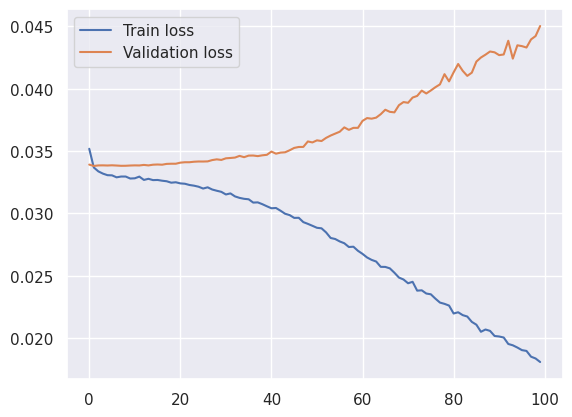

28/28 [==============================] - 1s 4ms/step
RMSE: 782.7057495117188
R2 Score: -0.444865736727063


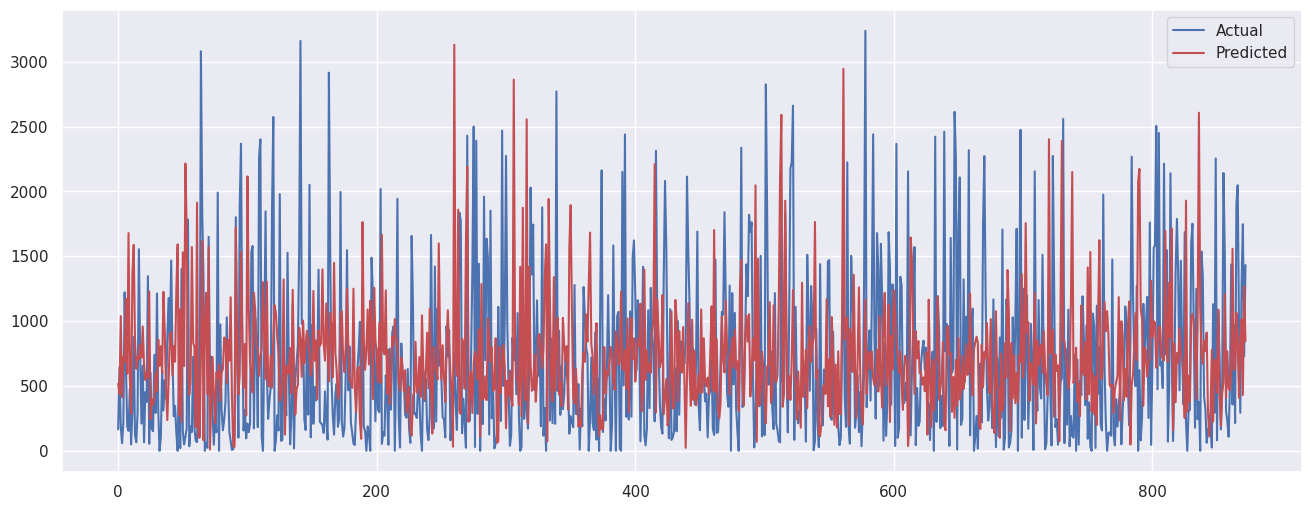

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf

# 加载数据
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

# 数据预处理
# 将数据划分为训练集和测试集
train, test = train_test_split(data, test_size=0.1, random_state=0)

# 移除 'Date' 列
train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])

# 转换 'Functioning Day' 列为数值类型
train['Functioning Day'] = train['Functioning Day'].map({'Yes': 1, 'No': 0})
test['Functioning Day'] = test['Functioning Day'].map({'Yes': 1, 'No': 0})

# 移除指定的特征工程列
columns_to_remove = ['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
train = train.drop(columns=columns_to_remove)
test = test.drop(columns=columns_to_remove)

# 数据归一化
scaler = MinMaxScaler()
num_colu = ['Temperature', 'Functioning Day']
train[num_colu] = scaler.fit_transform(train[num_colu].astype(np.float32))
test[num_colu] = scaler.transform(test[num_colu].astype(np.float32))

cnt_scaler = MinMaxScaler()
train["Rented Bike Count"] = cnt_scaler.fit_transform(train[["Rented Bike Count"]].astype(np.float32))
test["Rented Bike Count"] = cnt_scaler.transform(test[["Rented Bike Count"]].astype(np.float32))

# 对 "Seasons" 和 "Holiday" 列进行独热编码
train = pd.get_dummies(train, columns=['Seasons', 'Holiday'], prefix=['Seasons', 'Holiday'])
test = pd.get_dummies(test, columns=['Seasons', 'Holiday'], prefix=['Seasons', 'Holiday'])

# 准备时间序列数据
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs, dtype=np.float32), np.array(ys, dtype=np.float32)

time_steps = 3
X_train, y_train = create_dataset(train, train["Rented Bike Count"], time_steps)
X_test, y_test = create_dataset(test, test["Rented Bike Count"], time_steps)


# 建立模型
model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="mse")





# 训练模型
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
        shuffle=False
    )

# 模型评估
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# 测试集预测
y_pred = model.predict(X_test)

# 反归一化
y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = cnt_scaler.inverse_transform(y_pred)

# 性能指标
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
print("RMSE: {}\nR2 Score: {}".format(rmse, r2))

# 绘制预测与实际值
plt.figure(figsize=(16, 6))
plt.plot(y_test_inv.flatten(), label="Actual")
plt.plot(y_pred_inv.flatten(), label="Predicted", color="r")
plt.legend()
plt.show()

28/28 [==============================] - 0s 3ms/step


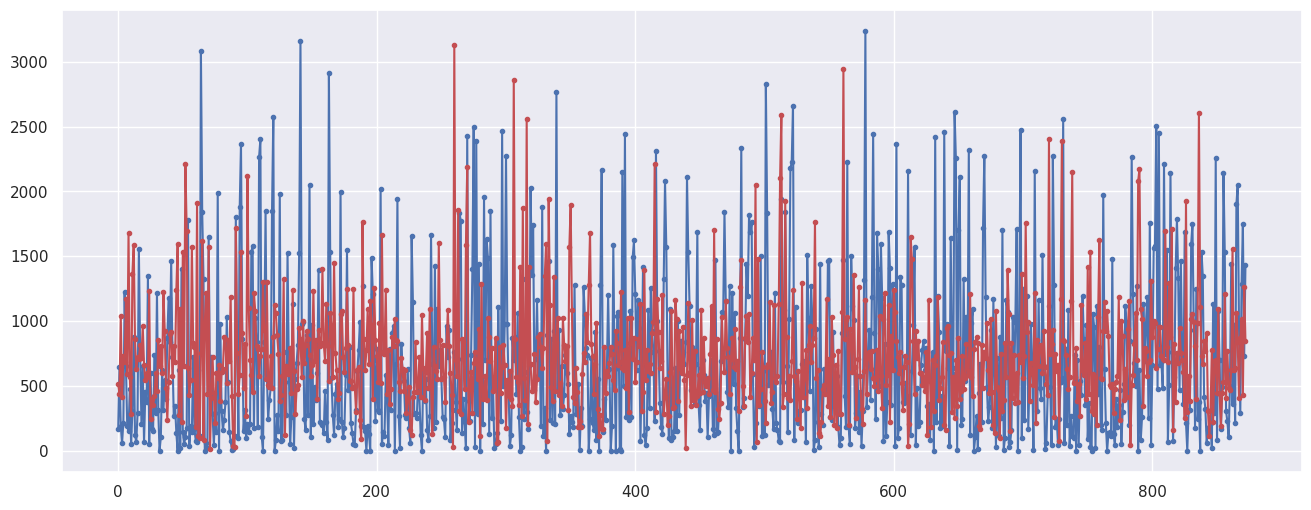

In [31]:
pred = model.predict(X_test)

y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
pred_inv = cnt_scaler.inverse_transform(pred)

plt.figure(figsize=(16,6))
plt.plot(y_test_inv.flatten(),marker=".",label="actual")
plt.plot(pred_inv.flatten(),marker=".",label="prediction",color="r")




In [32]:
y_test_actual = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
y_test_pred = cnt_scaler.inverse_transform(pred)

arr_1 = np.array(y_test_actual)
arr_2 = np.array(y_test_pred)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [33]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,165.000000,516.724060
1,646.000000,438.747620
2,190.000000,1037.816162
3,59.000004,413.243103
4,218.000000,727.687561


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(final.actual,final.predicted))
r2 = r2_score(final.actual,final.predicted)
print("rmse is : {}\nr2 is : {}".format(rmse,r2))

rmse is : 782.7057495117188
r2 is : -0.444865736727063


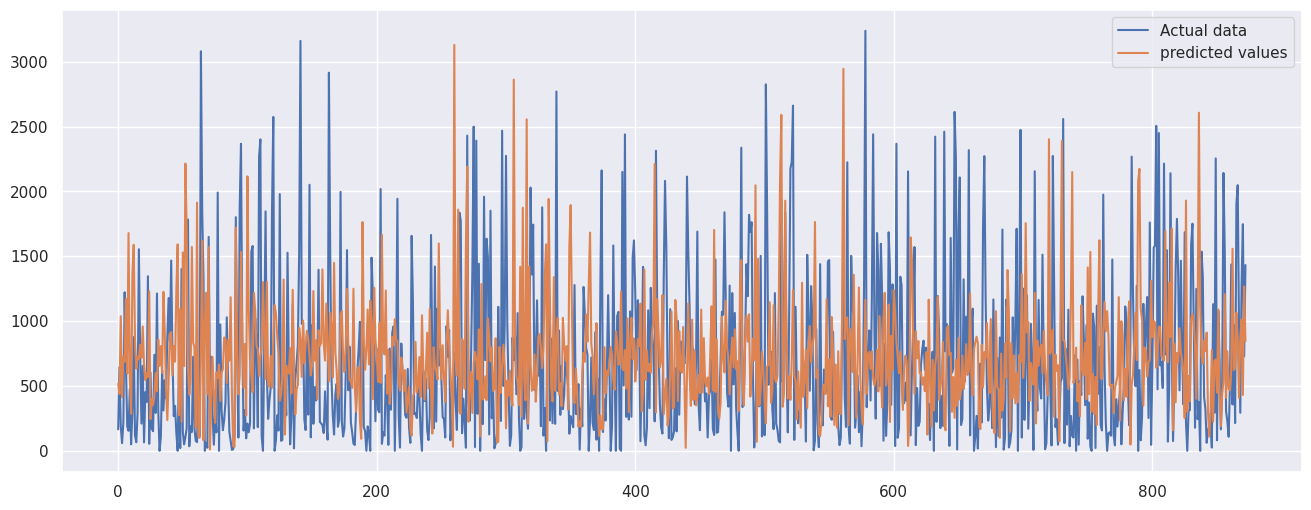

In [35]:
plt.figure(figsize=(16,6))
plt.plot(final.actual,label="Actual data")
plt.plot(final.predicted,label="predicted values")
plt.legend(loc="best")